In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from astropy.table import Table

In [2]:
real = Table.read('/tmp/nnpz_compare/r_shift9/n_real_28df65e39d0bae23d16711b2752c3cdb.fits')
combined = Table.read('/tmp/nnpz_compare/r_shift9/n_combined_8d0267b34f7f38fa476145f9eccc7b91.fits')

<IPython.core.display.Javascript object>


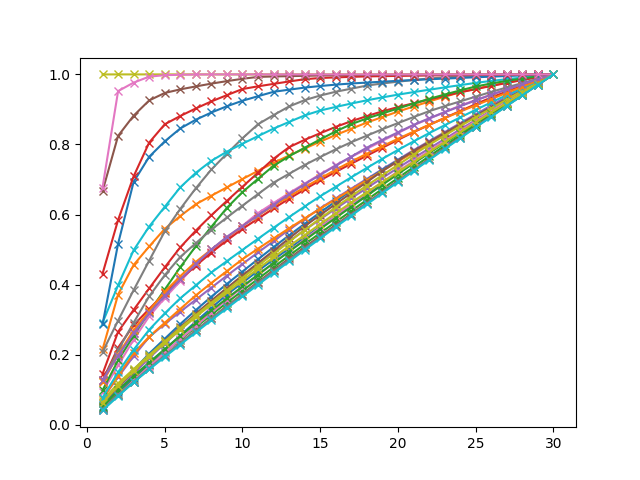

In [3]:
plt.figure(1)
for r in real[50:80]:
    plt.plot(np.arange(1,31), np.cumsum(-np.sort(-r['NeighborWeights']) / np.sum(r['NeighborWeights'])), 'x-')

In [4]:
np.flip(np.sort(real['NeighborWeights'][4]), axis=0)

array([ 0.03797942,  0.0368736 ,  0.03536954,  0.03498367,  0.0328177 ,
        0.03252006,  0.03251867,  0.03160929,  0.03144514,  0.03132327,
        0.03058744,  0.0291307 ,  0.02896657,  0.02879078,  0.02848929,
        0.02841586,  0.02810648,  0.02677932,  0.0263583 ,  0.02591546,
        0.02514557,  0.02438933,  0.02432442,  0.02354544,  0.02339252,
        0.02317169,  0.02306385,  0.02264614,  0.02207114,  0.02174709])

In [5]:
def get_threshold_matching(real, target, threshold=0.98):
    weight_sum = np.sum(real['NeighborWeights'], axis=1)
    weight_norm = np.divide(real['NeighborWeights'], weight_sum[:,None])
    weight_order = np.flip(np.argsort(weight_norm), axis=1)
    weight_sorted = np.array([w[s] for w, s in zip(real['NeighborWeights'], weight_order)])
    ids_sorted = np.array([i[s] for i, s in zip(real['NeighborIDs'], weight_order)])
    req_neighbors = 31-np.sum(np.cumsum(weight_norm, axis=1) > threshold, axis = 1)
    
    result_list = []
    for t, i, w, n in zip(target, ids_sorted, weight_sorted, req_neighbors):
        idx = np.isin(i[0:n], t['NeighborIDs'])
        found = i[0:n][idx]
        result_list.append(w[0:n][idx].sum() / w[0:n].sum())
    result = np.array(result_list)
    
    return req_neighbors, result

### Threshold is 0.6

<IPython.core.display.Javascript object>


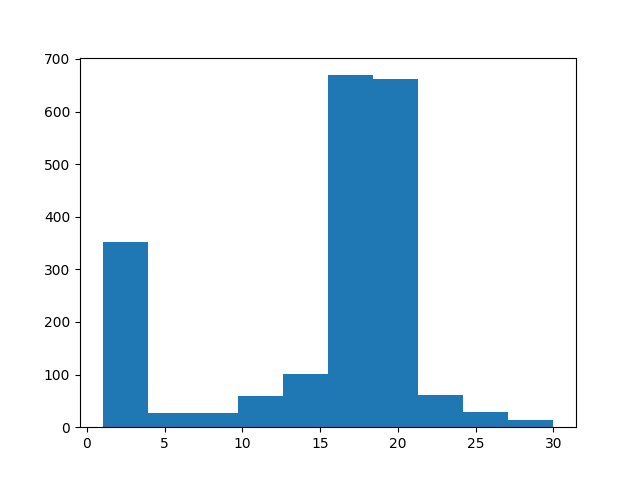

<IPython.core.display.Javascript object>


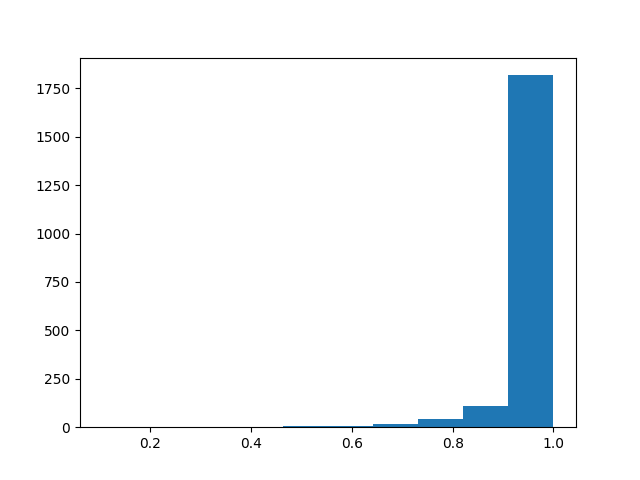

In [6]:
req_nn, matching_weights = get_threshold_matching(real, combined, 0.6)
plt.figure(2)
_ = plt.hist(req_nn)
plt.figure(3)
_ = plt.hist(matching_weights)

### Threshold is 0.98

<IPython.core.display.Javascript object>


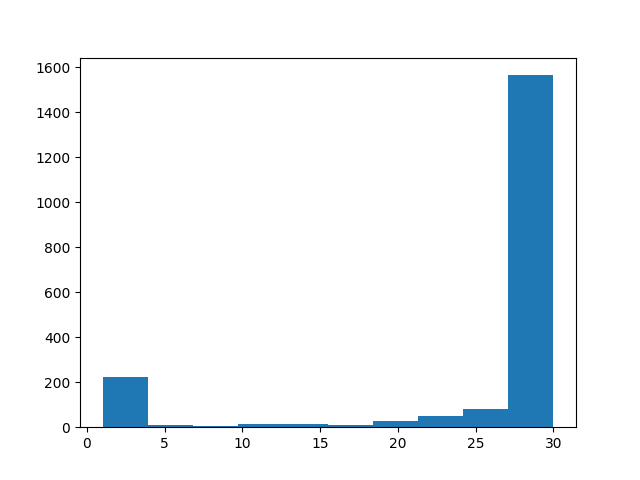

<IPython.core.display.Javascript object>


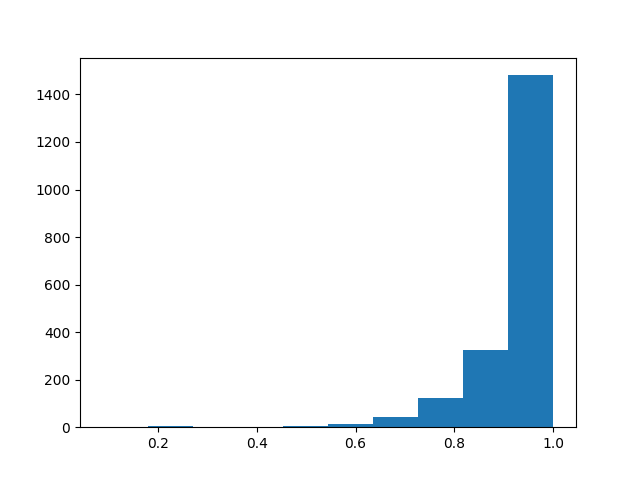

In [7]:
req_nn, matching_weights = get_threshold_matching(real, combined, 0.98)
plt.figure(4)
_ = plt.hist(req_nn)
plt.figure(5)
_ = plt.hist(matching_weights)

### All of them

<IPython.core.display.Javascript object>


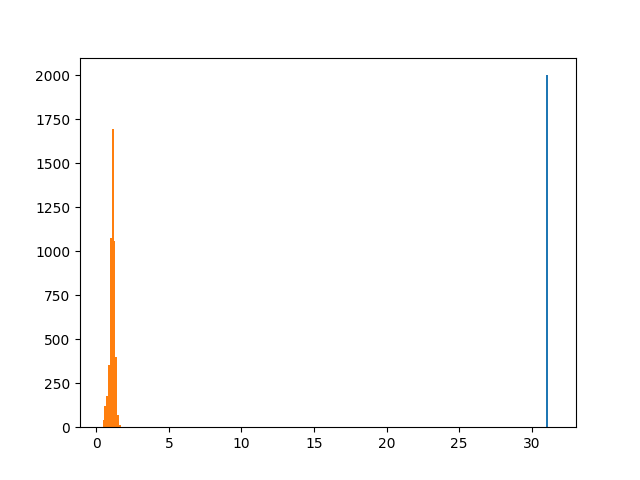

<IPython.core.display.Javascript object>


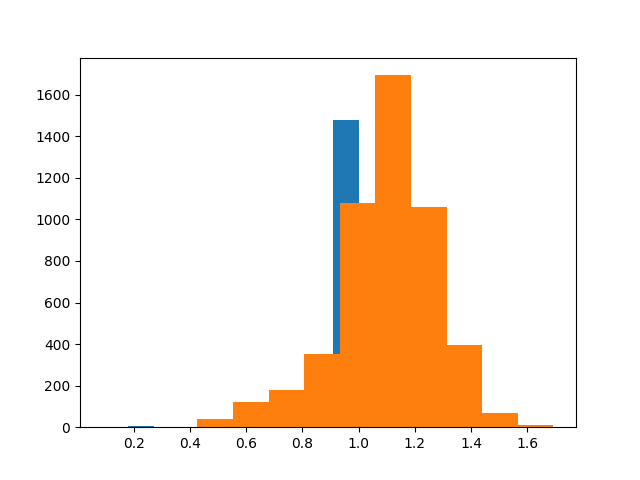

In [8]:
req_nn, matching_weights = get_threshold_matching(real, combined, 1.1)
plt.figure(6)
_ = plt.hist(req_nn)
plt.figure(7)
_ = plt.hist(matching_weights)

In [9]:
weight_sum = np.sum(real['NeighborWeights'], axis=1)
weight_norm = np.divide(real['NeighborWeights'], weight_sum[:,None])
weight_order = np.flip(np.argsort(weight_norm), axis=1)
weight_sorted = np.array([w[s] for w, s in zip(real['NeighborWeights'], weight_order)])

In [10]:
x=np.flip(np.sort(weight_norm, axis=1), axis=1)

In [11]:
np.ediff1d(x[1])

array([ -1.00000000e+000,  -1.30507939e-025,  -2.08140009e-041,
        -1.07676561e-043,  -2.35075277e-045,  -3.27405605e-062,
        -4.63152540e-077,  -3.28677587e-081,  -4.62248947e-111,
        -2.15455541e-132,  -3.79852446e-135,  -9.33342907e-135,
        -8.32064860e-136,  -3.91820708e-139,  -7.12812615e-142,
        -9.37101170e-148,  -7.35300683e-149,  -1.26626527e-157,
        -2.72238019e-164,  -6.68783808e-177,  -1.03719686e-182,
        -3.53748821e-185,  -1.07540258e-189,  -9.39665972e-197,
        -3.74385916e-203,  -1.11399725e-211,  -7.58118046e-222,
        -4.56055224e-224,  -3.77205018e-229])

<IPython.core.display.Javascript object>


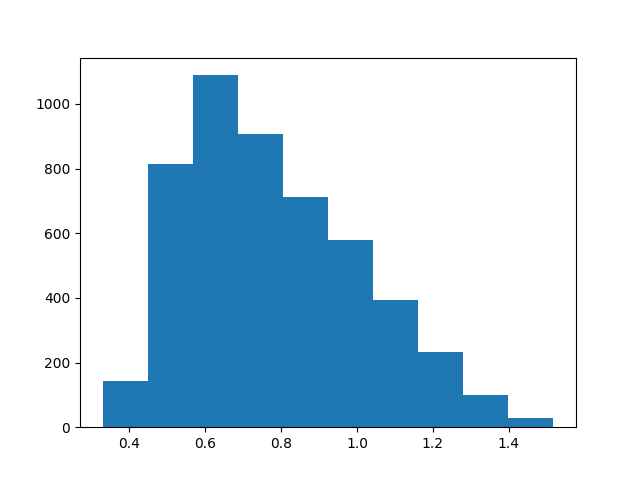

(array([  142.,   814.,  1089.,   908.,   712.,   580.,   393.,   232.,
          100.,    30.]),
 array([ 0.33017167,  0.44888655,  0.56760142,  0.68631629,  0.80503116,
         0.92374603,  1.04246091,  1.16117578,  1.27989065,  1.39860552,
         1.51732039]),
 <a list of 10 Patch objects>)

In [22]:
euclidean = Table.read('/tmp/nnpz_compare/r_shift9/n_real_d329fe59e76ea95cff543fdf1f67b231.fits')
dist=1/euclidean['NeighborWeights'][10]
plt.figure()
plt.hist(dist)

<IPython.core.display.Javascript object>


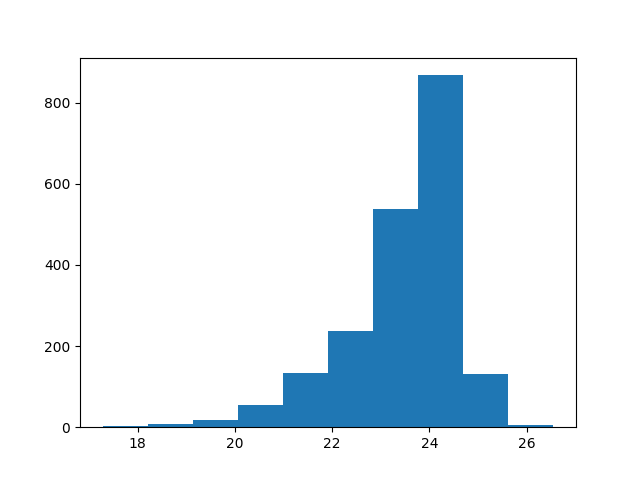

23.9187


(array([   4.,    7.,   17.,   55.,  134.,  238.,  539.,  868.,  132.,    6.]),
 array([ 17.27928352,  18.20659733,  19.13391113,  20.06122494,
         20.98853874,  21.91585255,  22.84316635,  23.77048016,
         24.69779396,  25.62510777,  26.55242157]),
 <a list of 10 Patch objects>)

In [28]:
plt.figure()
print(euclidean['r_shift9_obs_mag'][10])
plt.hist(euclidean['r_shift9_obs_mag'])

<IPython.core.display.Javascript object>


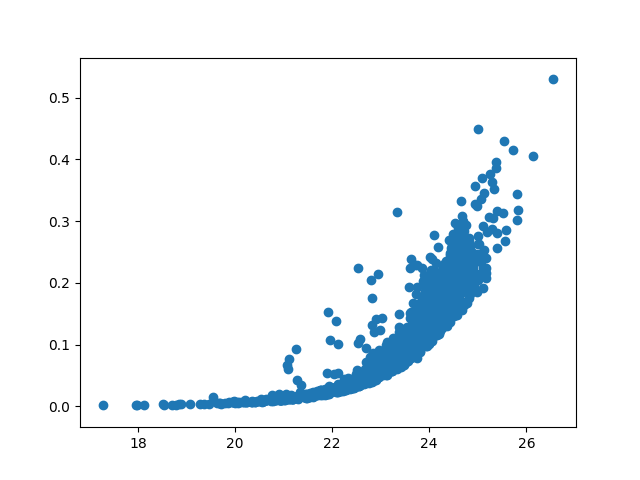

In [29]:
plt.figure()
plt.scatter(euclidean['r_shift9_obs_mag'], euclidean['r_shift9_obs_mag_err'])

<IPython.core.display.Javascript object>


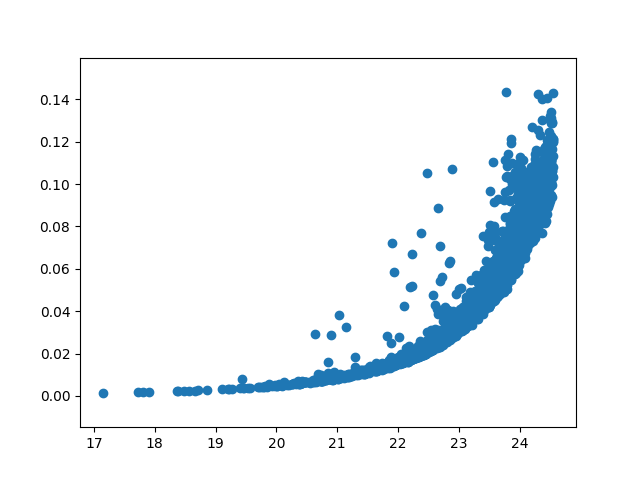

In [30]:
plt.figure()
plt.scatter(euclidean['vis_obs_mag'], euclidean['vis_obs_mag_err'])